In [1]:
import os
import xlrd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime as dt
import copy
import statsmodels.api as sm
import matplotlib.dates as mdate
import scipy.optimize as spo
from scipy.stats import norm

In [2]:
file='C:\\Users\\wuboyuan\\Desktop\\data\\9500.csv'

In [3]:
data=pd.read_csv(file,parse_dates=True,index_col=0)
w=copy.deepcopy(data)

In [4]:
wu=data.rolling(center=False,window=10).mean()

In [5]:
v=wu.T.values[0]
i=wu.index
wu0=pd.DataFrame({'均线':v},index=i)

In [6]:
v

array([      nan,       nan,       nan, ...,  3248.455,  3246.961,
        3247.547])

In [7]:
w['均线']=v

In [8]:
def ema(data,n):
    y=copy.deepcopy(data)
    y[0:n-1].T.values[0]=np.zeros(n-1)
    y[n-1:n]=data[0:n].mean().values[0]
    for i in range(len(data)-n):
        y[i+n:i+n+1]=2/(n+1)*data[i+n:i+n+1].values[0][0]+(1-2/(n+1))*y[i+n-1:i+n].values[0][0]
    return y

In [9]:
y=copy.deepcopy(data)
y[0:11].T.values[0]=np.zeros(11)
y[11:12]=data[0:12].mean().values[0]
for i in range(len(data)-12):
    y[i+12:i+13]=2/13*data[i+12:i+13].values[0][0]+(1-2/13)*y[i+11:i+12].values[0][0]

In [10]:
ema12=ema(data,12)
ema26=ema(data,26)

In [11]:
diff=ema12-ema26

In [12]:
dea=ema(diff[26:],9)

In [13]:
macd=diff-dea

In [14]:
w['macd']=macd

In [15]:
rdata=w[100:]

In [16]:
rdata['收盘']=rdata['    收盘'].values

C:\Users\wuboyuan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
del rdata['    收盘']

In [18]:
rdata[rdata.T.index[0]].values

array([ 1915.114,  1918.888,  1922.768, ...,  3248.455,  3246.961,
        3247.547])

In [19]:
cx=rdata['收盘']-rdata['均线']

In [20]:
cx[cx>0]=1
cx[cx<0]=0

In [21]:
cxd=cx.diff(1)#.plot(kind='bar')
#plt.show()

In [22]:
cxd[0:100]

      时间
2000-06-13    NaN
2000-06-14    0.0
2000-06-15    0.0
2000-06-16    0.0
2000-06-19   -1.0
2000-06-20    0.0
2000-06-21    0.0
2000-06-22    0.0
2000-06-23    1.0
2000-06-26    0.0
2000-06-27    0.0
2000-06-28    0.0
2000-06-29    0.0
2000-06-30   -1.0
2000-07-03    0.0
2000-07-04    0.0
2000-07-05    0.0
2000-07-06    0.0
2000-07-07    1.0
2000-07-10    0.0
2000-07-11    0.0
2000-07-12    0.0
2000-07-13    0.0
2000-07-14    0.0
2000-07-17    0.0
2000-07-18    0.0
2000-07-19    0.0
2000-07-20    0.0
2000-07-21    0.0
2000-07-24    0.0
             ... 
2000-09-19    0.0
2000-09-20    0.0
2000-09-21    0.0
2000-09-22    0.0
2000-09-25    0.0
2000-09-26    0.0
2000-09-27    0.0
2000-09-28    0.0
2000-09-29    1.0
2000-10-09    0.0
2000-10-10    0.0
2000-10-11    0.0
2000-10-12    0.0
2000-10-13    0.0
2000-10-16   -1.0
2000-10-17    0.0
2000-10-18    1.0
2000-10-19   -1.0
2000-10-20    1.0
2000-10-23    0.0
2000-10-24    0.0
2000-10-25    0.0
2000-10-26    0.0
2000-10-27    0.0
2

In [23]:
inde=cxd[cxd!=0].dropna().index

In [24]:
cxd[inde[0]:inde[1]].count()

5

In [25]:
u=copy.deepcopy(cxd)

In [26]:
cxd[inde[0]:inde[1]]

      时间
2000-06-19   -1.0
2000-06-20    0.0
2000-06-21    0.0
2000-06-22    0.0
2000-06-23    1.0
dtype: float64

In [27]:
for i in range(len(inde)-1):
    ct=cxd[inde[i]:inde[i+1]].count()
    if ct<4:
        u[inde[i]:inde[i]]=0
        u[inde[i+1]:inde[i+1]]=0
    else:
        u[inde[i]:inde[i]]=cxd[inde[i]:inde[i]]

In [28]:
co=u[u!=0].index

In [29]:
cxd['2016-10-1':'2016-11-6']

      时间
2016-10-10    1.0
2016-10-11    0.0
2016-10-12    0.0
2016-10-13    0.0
2016-10-14    0.0
2016-10-17    0.0
2016-10-18    0.0
2016-10-19    0.0
2016-10-20    0.0
2016-10-21    0.0
2016-10-24    0.0
2016-10-25    0.0
2016-10-26    0.0
2016-10-27    0.0
2016-10-28    0.0
2016-10-31   -1.0
2016-11-01    1.0
2016-11-02   -1.0
2016-11-03    1.0
2016-11-04    0.0
dtype: float64

In [30]:
z=copy.deepcopy(u)

In [31]:
for i in range(len(co)-2):
    if z[co[i+1]:co[i+1]].values[0]==z[co[i+2]:co[i+2]].values[0]:
          u[co[i+2]:co[i+2]].values[0]=0

In [32]:
d_index=u[u!=0].dropna().index

In [33]:
dic=list([0])
for i in range(len(d_index)-1):
    eve=rdata['macd'][d_index[i]:d_index[i+1]].diff(1)
    eve[eve<0]=0
    eve[eve>0]=1
    zz=eve.diff(1).dropna()
    f_index=zz[zz!=0].index
    if len(f_index)==0:
        print(i)
        dic.append(str(d_index[i+1]))
    else:
        l_index=str(f_index[len(f_index)-1])
        dic.append(l_index)
del dic[0]

43
148
186


In [34]:
l_dic=copy.deepcopy(dic)

In [35]:
for i in range(len(dic)-1):
    mi=data[dic[i]:dic[i+1]].index
    l_dic[i+1]=str(mi[len(mi)-2])

In [36]:
result=pd.DataFrame({'开始日期':l_dic[0:len(dic)-1],'结束日期':l_dic[1:]})

In [37]:
knum=np.zeros(len(l_dic)-1)
snum=np.zeros(len(l_dic)-1)
for i in range(len(l_dic)-1):
    knum[i]=data[l_dic[i]:l_dic[i+1]].count()-1
    snum[i]=data[l_dic[i+1]:l_dic[i+1]].values[0][0]/data[l_dic[i]:l_dic[i]].values[0][0]-1

In [38]:
data[l_dic[i+1]:l_dic[i+1]].values[0][0]/data[l_dic[i]:l_dic[i]].values[0][0]-1

-0.013605921100962259

In [39]:
result['K线个数']=knum

In [40]:
result['涨跌']=snum

In [41]:
result=result[1:]

In [42]:
import csv
with open('C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\kk.csv', 'w') as f:
    #f.write(codecs.BOM_UTF8)
    writer = csv.writer(f,lineterminator='\n')
    writer.writerow(result.T.index)
    writer.writerows(result.values)

In [47]:
import seaborn as sns

C:\Users\wuboyuan\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


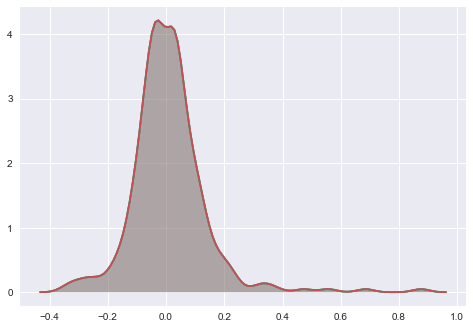

In [50]:
sns.kdeplot(snum,shade=True)
plt.show()

C:\Users\wuboyuan\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


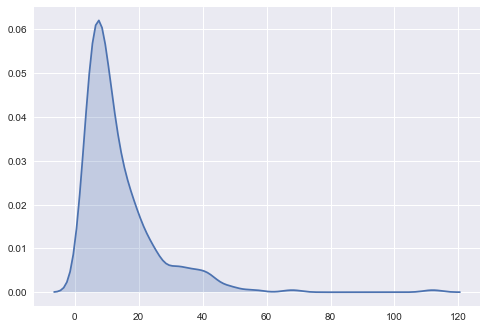

In [51]:
sns.kdeplot(knum,shade=True)
plt.show()